# Message Filtering

In [1]:
from at_nlp.filters.string_filter import StringFilter
from pathlib import Path
from functools import partial
from snorkel.labeling import labeling_function
import pandas as pd
import numpy as np
from dask.diagnostics import Profiler, ResourceProfiler, CacheProfiler
from dask.diagnostics import ProgressBar
from dask.diagnostics import visualize
from dask.distributed import LocalCluster
from dask.distributed import Client

In [2]:
num_processors = 10
cluster = LocalCluster(n_workers=num_processors)          # Fully-featured local Dask cluster
client = cluster.get_client()
client

/Users/dalton/miniconda3/envs/topic-model/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 56714 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:56714/status,
Dashboard: http://127.0.0.1:56714/status,Workers: 10
Total threads: 20,Total memory: 36.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:56715,Workers: 10
Dashboard: http://127.0.0.1:56714/status,Total threads: 20
Started: Just now,Total memory: 36.00 GiB
Comm: tcp://127.0.0.1:56738,Total threads: 2
Dashboard: http://127.0.0.1:56741/status,Memory: 3.60 GiB
Nanny: tcp://127.0.0.1:56718,


In [3]:
%load_ext rich

In [3]:
data_path = Path("/home/dwalker/SIGIL/natural_language_processing/nitmre/data/(CUI) alexa_816th_file_1a1.csv")
assert data_path.exists(), f"Data path {data_path} does not exist"
data = pd.read_csv(data_path)

In [ ]:
sf.register_preprocessor([(0, fn)])
sf.register_csv_preprocessor(data_path, idx)
sf.register_csv_preprocessor(data_path2, idx)

sf.csv_name_data = dict()
sf.csv_name_data2 = dict()
sf.data.extend(csv_name, csv_name2)

In [4]:
sf = StringFilter()
sf.reset()

In [5]:
def lower_case(ds: pd.Series, col_idx: int):
    _s: str = ds.iat[col_idx]
    _s = _s.lower()
    ds.iat[col_idx] = _s
    return ds

def upper_case(ds: pd.Series, col_idx: int):
    _s: str = ds.iat[col_idx]
    _s = _s.upper()
    ds.iat[col_idx] = _s
    return ds


pre_processors = [
    (1, lower_case),
    (0, upper_case)
]

sf.register_preprocessor(pre_processors)

In [6]:
sf.print_preprocessor_stack()

          Preprocessor Callstack           
┏━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃ Function   ┃ Type               ┃
┡━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ 0     │ upper_case │ <class 'function'> │
├───────┼────────────┼────────────────────┤
│ 1     │ lower_case │ <class 'function'> │
└───────┴────────────┴────────────────────┘

In [8]:
test_csv_path = Path("../../tests/test.csv")

In [9]:
sf.register_csv_preprocessor(test_csv_path)
sf.print_preprocessor_stack()

[20:47:18] Registering CSV for preprocessing: test                                             ]8;id=449129;file:///Users/dalton/dev/SIGIL/natural_language_processing/at_nlp/at_nlp/filters/string_filter.py\string_filter.py]8;;\:]8;id=443539;file:///Users/dalton/dev/SIGIL/natural_language_processing/at_nlp/at_nlp/filters/string_filter.py#395\395]8;;\

           CSV registered successfully at callstack position: 2!                               ]8;id=850366;file:///Users/dalton/dev/SIGIL/natural_language_processing/at_nlp/at_nlp/filters/string_filter.py\string_filter.py]8;;\:]8;id=378153;file:///Users/dalton/dev/SIGIL/natural_language_processing/at_nlp/at_nlp/filters/string_filter.py#429\429]8;;\

              Preprocessor Callstack              
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃ Function          ┃ Type               ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ 0     │ upper_case        │ <class 'function'> │
├───────┼───────────────────┼────────────────────┤
│ 1     │ lower_case        │ <class 'function'> │
├───────┼───────────────────┼────────────────────┤
│ 2     │ test_preprocessor │ <class 'function'> │
└───────┴───────────────────┴────────────────────┘

In [10]:
test_arr = [[idx, f"test{idx}"] for idx in range(10_000)]

csv_indices = np.random.randint(low=1, high=1000, size=(200,))

for idx in csv_indices:
    test_arr[idx] = [idx, "APL"]

test_df = pd.DataFrame(
    test_arr,
    columns=["id", "text"],
)

In [11]:
num_divisions = 20

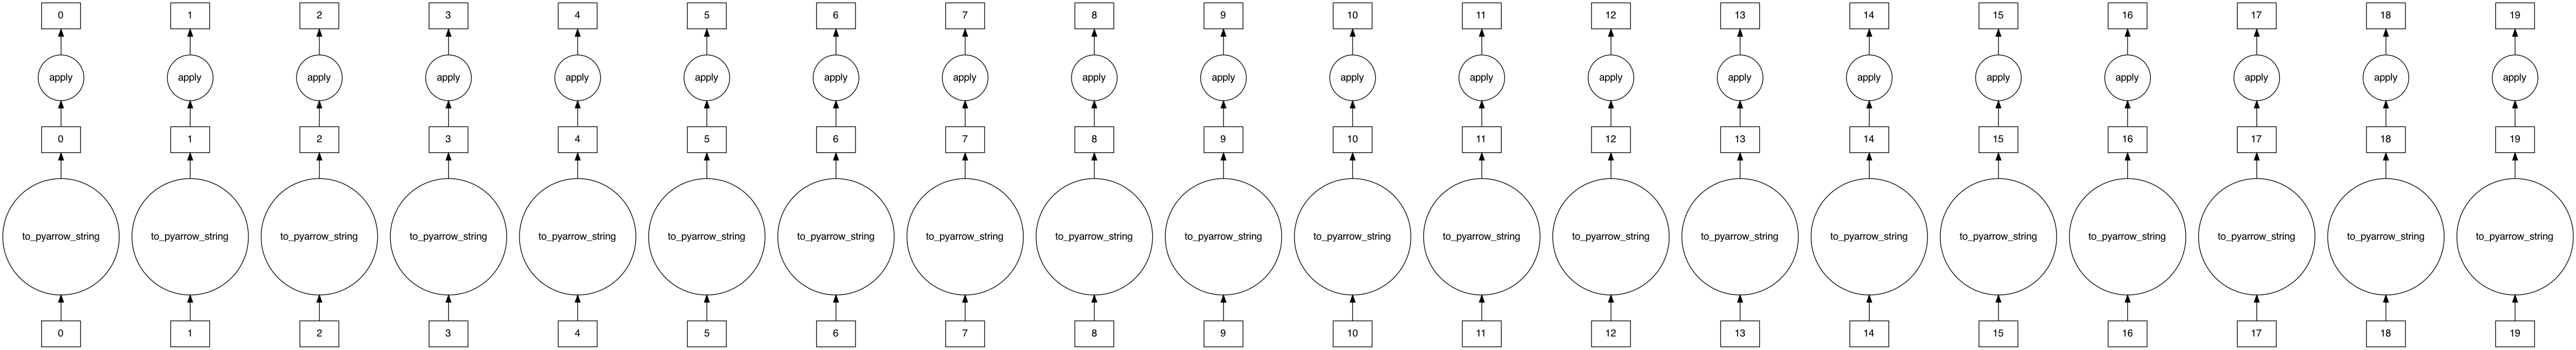

In [12]:
sf.preprocess(test_df, 1, True, num_divisions, False).visualize()

In [13]:
out_df = sf.preprocess(test_df, 1, True, num_divisions, False).compute()

In [14]:
out_df.head(100)

,id,text
0,0,test0
1,1,test1
2,2,test2
3,3,test3
4,4,test4
...,...,...
95,95,A Programming Language
96,96,test96
97,97,test97
98,98,test98


In [17]:
%timeit sf.preprocess(test_df, 1, False, num_divisions, False)

726 ms ± 12.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Train

In [4]:
msg_filter.train(
    data, 
    {
        "stage-one": {
            "split": 0.9,
            "amt": 2000
        },
        "stage-two": {
            "split": 0.9,
            "amt": 1700
        }
    }, 
    serialize=False
)

100%|██████████| 3700/3700 [00:00<00:00, 4130.54it/s]


[10:49:11] Template miner training complete!                                                   ]8;id=798399;file:///home/dwalker/SIGIL/natural_language_processing/lib/filters/string_filter.py\string_filter.py]8;;\:]8;id=466297;file:///home/dwalker/SIGIL/natural_language_processing/lib/filters/string_filter.py#332\332]8;;\

[10:49:13] RF training complete: elapsed time 1.3519632816314697s                              ]8;id=411534;file:///home/dwalker/SIGIL/natural_language_processing/lib/filters/string_filter.py\string_filter.py]8;;\:]8;id=281337;file:///home/dwalker/SIGIL/natural_language_processing/lib/filters/string_filter.py#482\482]8;;\

        Random Forest Performance         
┏━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Metric    ┃ Value ┃ Percentage ┃ Total ┃
┡━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ Correct   │ 158   │ 76.70%     │ 206   │
├───────────┼───────┼────────────┼───────┤
│ Incorrect │ 48    │ 23.30%     │ 206   │
└───────────┴───────┴────────────┴───────┘

[10:49:26] MLP training complete: elapsed time 13.34616231918335                               ]8;id=686471;file:///home/dwalker/SIGIL/natural_language_processing/lib/filters/string_filter.py\string_filter.py]8;;\:]8;id=936316;file:///home/dwalker/SIGIL/natural_language_processing/lib/filters/string_filter.py#491\491]8;;\

          Perceptron Performance          
┏━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Metric    ┃ Value ┃ Percentage ┃ Total ┃
┡━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ Correct   │ 163   │ 79.13%     │ 206   │
├───────────┼───────┼────────────┼───────┤
│ Incorrect │ 43    │ 20.87%     │ 206   │
└───────────┴───────┴────────────┴───────┘

100%|██████████| 1523/1523 [00:05<00:00, 279.33it/s]
INFO:root:Computing O...
INFO:root:Estimating \mu...
/home/dwalker/miniconda3/envs/topic-model/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 500/500 [00:01<00:00, 286.16epoch/s]
INFO:root:Finished Training


[10:49:35] Label model training complete: elapsed time %s 2.5925705432891846                   ]8;id=279501;file:///home/dwalker/SIGIL/natural_language_processing/lib/filters/string_filter.py\string_filter.py]8;;\:]8;id=112931;file:///home/dwalker/SIGIL/natural_language_processing/lib/filters/string_filter.py#531\531]8;;\

         Label Model Performance          
┏━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Metric    ┃ Value ┃ Percentage ┃ Total ┃
┡━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ Correct   │ 129   │ 72.88%     │ 177   │
├───────────┼───────┼────────────┼───────┤
│ Incorrect │ 48    │ 27.12%     │ 177   │
└───────────┴───────┴────────────┴───────┘

In [5]:
row_apply = partial(msg_filter.template_miner_transform, tm=msg_filter.template_miner)

In [6]:
test_set = msg_filter.stage_one_test_data
test_labels = test_set["labels"]

In [7]:
msg_filter.latency_trace(test_set)

  0%|          | 0/206 [00:00<?, ?it/s]

100%|██████████| 206/206 [00:00<00:00, 280.48it/s]


[10:49:59] [                                                                                   ]8;id=562248;file:///home/dwalker/SIGIL/natural_language_processing/lib/filters/string_filter.py\string_filter.py]8;;\:]8;id=589633;file:///home/dwalker/SIGIL/natural_language_processing/lib/filters/string_filter.py#429\429]8;;\
               ['drain', '0.0002s'],                                                                               
               ['rf', '0.0046s'],                                                                                  
               ['mlp', '0.0004s'],                                                                                 
               ['channel', '0.0000s'],                                                                             
               ['length', '0.0000s'],                                                                              
               ['hello', '0.0000s'],                                                                               
               ['roger', '0.0000s'],                                                                               
               ['lunch', '0.0000s'],                                                                               
               ['rf', '0.0038s'],                                                                                  
               ['mlp', '0.0002s'],                                                                                 
               ['channel', '0.0000s'],                                                                             
               ['length', '0.0000s'],                                                                              
               ['hello', '0.0000s'],                                                                               
               ['roger', '0.0000s'],                                                                               
               ['lunch', '0.0000s'],                                                                               
               ['rf', '0.0036s'],                                                                                  
               ['mlp', '0.0002s'],                                                                                 
               ['channel', '0.0000s'],                                                                             
               ['length', '0.0000s'],                                                                              
               ['hello', '0.0000s'],                                                                               
               ['roger', '0.0000s'],                                                                               
               ['lunch', '0.0000s'],                                                                               
               ['rf', '0.0033s'],                                                                                  
               ['mlp', '0.0002s'],                                                                                 
               ['channel', '0.0000s'],                                                                             
               ['length', '0.0000s'],                                                                              
               ['hello', '0.0000s'],                                                                               
               ['roger', '0.0000s'],                                                                               
               ['lunch', '0.0000s'],                                                                               
               ['rf', '0.0033s'],                                                                                  
               ['mlp', '0.0002s'],                                                                                 
               ['channel', '0.0000s'],                                  

### Test Stage One

In [10]:
msg_filter.evaluate(test_set, test_labels, "rf")
msg_filter.evaluate(test_set, test_labels, "mlp")

        Random Forest Performance         
┏━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Metric    ┃ Value ┃ Percentage ┃ Total ┃
┡━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ Correct   │ 134   │ 73.22%     │ 183   │
├───────────┼───────┼────────────┼───────┤
│ Incorrect │ 49    │ 26.78%     │ 183   │
└───────────┴───────┴────────────┴───────┘

          Perceptron Performance          
┏━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Metric    ┃ Value ┃ Percentage ┃ Total ┃
┡━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ Correct   │ 143   │ 78.14%     │ 183   │
├───────────┼───────┼────────────┼───────┤
│ Incorrect │ 40    │ 21.86%     │ 183   │
└───────────┴───────┴────────────┴───────┘

## Label Ensemble

### Data Preparation

In [12]:
test_set = msg_filter.stage_two_test_data
test_labels = test_set["labels"]
test_set = msg_filter.applier.apply(test_set)

100%|██████████| 152/152 [00:00<00:00, 658.84it/s]


### Test Ensemble

In [13]:
msg_filter.evaluate(test_set, test_labels, "label_model")

         Label Model Performance          
┏━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Metric    ┃ Value ┃ Percentage ┃ Total ┃
┡━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ Correct   │ 99    │ 65.13%     │ 152   │
├───────────┼───────┼────────────┼───────┤
│ Incorrect │ 53    │ 34.87%     │ 152   │
└───────────┴───────┴────────────┴───────┘

In [14]:
ds = data[:5]
msg_filter.predict(ds)

100%|██████████| 5/5 [00:00<00:00, 368.89it/s]


array([2, 2, 2, 2, 2])

In [15]:
@labeling_function()
def lf_confirmation(in_ds: pd.Series) -> int:
    msg = in_ds["Message"]
    msg = msg.lower()
    if "wilco" in msg or "affirm" in msg or "ok" in msg:
        return 2
    return 0

In [16]:
msg_filter.register_new_labeling_fn([lf_confirmation])

In [17]:
msg_filter.labeling_functions

[LabelingFunction lf_rf_rbf, Preprocessors: [],
 LabelingFunction lf_mlp, Preprocessors: [],
 LabelingFunction lf_channel, Preprocessors: [],
 LabelingFunction lf_length, Preprocessors: [],
 LabelingFunction lf_hello, Preprocessors: [],
 LabelingFunction lf_roger, Preprocessors: [],
 LabelingFunction lf_lunch, Preprocessors: [],
 LabelingFunction lf_confirmation, Preprocessors: []]

In [19]:
msg_filter.train(
    data, 
    {
        "stage-one": {
            "split": 0.9,
            "amt": 2000
        },
        "stage-two": {
            "split": 0.9,
            "amt": 1700
        }
    }, 
    serialize=False
)

100%|██████████| 3700/3700 [00:00<00:00, 7165.32it/s]


[00:24:36] Template miner training complete!                                                   ]8;id=397540;file:///Users/dalton/dev/SIGIL/natural_language_processing/lib/filters/string_filter.py\string_filter.py]8;;\:]8;id=562248;file:///Users/dalton/dev/SIGIL/natural_language_processing/lib/filters/string_filter.py#282\282]8;;\

[00:24:37] RF training complete: elapsed time 0.646773099899292s                               ]8;id=54422;file:///Users/dalton/dev/SIGIL/natural_language_processing/lib/filters/string_filter.py\string_filter.py]8;;\:]8;id=167418;file:///Users/dalton/dev/SIGIL/natural_language_processing/lib/filters/string_filter.py#377\377]8;;\

        Random Forest Performance         
┏━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Metric    ┃ Value ┃ Percentage ┃ Total ┃
┡━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ Correct   │ 159   │ 75.71%     │ 210   │
├───────────┼───────┼────────────┼───────┤
│ Incorrect │ 51    │ 24.29%     │ 210   │
└───────────┴───────┴────────────┴───────┘

[00:24:40] MLP training complete: elapsed time 2.6421210765838623                              ]8;id=735775;file:///Users/dalton/dev/SIGIL/natural_language_processing/lib/filters/string_filter.py\string_filter.py]8;;\:]8;id=257072;file:///Users/dalton/dev/SIGIL/natural_language_processing/lib/filters/string_filter.py#386\386]8;;\

          Perceptron Performance          
┏━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Metric    ┃ Value ┃ Percentage ┃ Total ┃
┡━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ Correct   │ 156   │ 74.29%     │ 210   │
├───────────┼───────┼────────────┼───────┤
│ Incorrect │ 54    │ 25.71%     │ 210   │
└───────────┴───────┴────────────┴───────┘

100%|██████████| 1535/1535 [00:02<00:00, 674.03it/s]
INFO:root:Computing O...
INFO:root:Estimating \mu...
  0%|          | 0/500 [00:00<?, ?epoch/s]INFO:root:[0 epochs]: TRAIN:[loss=2.448]
INFO:root:[100 epochs]: TRAIN:[loss=0.010]
INFO:root:[200 epochs]: TRAIN:[loss=0.004]
INFO:root:[300 epochs]: TRAIN:[loss=0.002]
100%|██████████| 500/500 [00:00<00:00, 3900.50epoch/s]
INFO:root:Finished Training


[00:24:43] Label model training complete: elapsed time %s 0.13729166984558105                  ]8;id=427023;file:///Users/dalton/dev/SIGIL/natural_language_processing/lib/filters/string_filter.py\string_filter.py]8;;\:]8;id=279501;file:///Users/dalton/dev/SIGIL/natural_language_processing/lib/filters/string_filter.py#426\426]8;;\

         Label Model Performance          
┏━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Metric    ┃ Value ┃ Percentage ┃ Total ┃
┡━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ Correct   │ 116   │ 70.30%     │ 165   │
├───────────┼───────┼────────────┼───────┤
│ Incorrect │ 49    │ 29.70%     │ 165   │
└───────────┴───────┴────────────┴───────┘

In [22]:
test_set = msg_filter.stage_two_test_data
test_labels = test_set["labels"]
test_set = msg_filter.applier.apply(test_set)
msg_filter.evaluate(test_set, test_labels, "label_model")

100%|██████████| 165/165 [00:00<00:00, 645.14it/s]


         Label Model Performance          
┏━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Metric    ┃ Value ┃ Percentage ┃ Total ┃
┡━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ Correct   │ 116   │ 70.30%     │ 165   │
├───────────┼───────┼────────────┼───────┤
│ Incorrect │ 49    │ 29.70%     │ 165   │
└───────────┴───────┴────────────┴───────┘